# Algorithm performance and running time comparison on synthetic data (Figures 3,4)

In this notebook we produce plots to compare the performance of the algorithms presented in the paper in terms of utility and running time for additive and outcome monotonic instances. The resulting plots are presented in Figures 3,4.

**Required script execution:** additive.sh

In [1]:
import os
os.chdir("../../")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import json
from lib import utils
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
sns.set_context("paper", font_scale=4)

In [24]:
name="additive"
final_df = []
cols = sns.color_palette("Set2",9)
col_dict = {"Non-Strategic": cols[0],
            "Bruteforce": cols[1],
            "Threshold": cols[2],
            "Iterative": cols[3],
            "DP": cols[5]
           }
linestyles_dict = {"Non-Strategic": "-.",
            "Bruteforce": "-",
            "Threshold": "-",
            "Iterative": "--",
            "DP": ":"
           }
markers_dict = {"Non-Strategic": "v",
            "Bruteforce": "s",
            "Threshold": "^",
            "Iterative": "o",
            "DP": "D"
           }

In [25]:
files = glob.glob("./outputs/optimal/{name}_bruteforce*_config.json".format(name=name))
data = []

for fi in files:
    with open(fi,"r") as file:
        data.append(json.load(file))
df_standard = pd.DataFrame(data)
final_df.append(df_standard.melt(id_vars=["m", "seed", "kappa", "sparsity", "time", "pi", "bruteforce_br"], var_name="algorithm", value_name="utility"))

In [26]:
files = glob.glob("./outputs/optimal/{name}_dp_*_config.json".format(name=name))
data = []
for fi in files:
    with open(fi,"r") as file:
        data.append(json.load(file))
df_standard = pd.DataFrame(data)
final_df.append(df_standard.melt(id_vars=["m", "seed", "kappa", "time", "iterations", "pi", "dp_br"], var_name="algorithm", value_name="utility"))

In [27]:
files = glob.glob("./outputs/optimal/{name}_iterative*_config.json".format(name=name))
data = []

for fi in files:
    with open(fi,"r") as file:
        data.append(json.load(file))
df_standard = pd.DataFrame(data)
final_df.append(df_standard.melt(id_vars=["m", "seed", "kappa", "sparsity", "time", "parallel", "split_components", "iterations", "pi", "strategic_br", "pi_non_strategic", "non_strategic_br", "strategic_deter_br", "pi_strategic_deter", "strategic_deter"], var_name="algorithm", value_name="utility"))

In [28]:
files = glob.glob("./outputs/optimal/{name}_thres*_config.json".format(name=name))
data = []

for fi in files:
    with open(fi,"r") as file:
        data.append(json.load(file))
df_standard = pd.DataFrame(data)
final_df.append(df_standard.melt(id_vars=["m", "seed", "kappa", "sparsity", "time", "pi", "strategic_threshold_br"], var_name="algorithm", value_name="utility"))

In [29]:
df = pd.concat(final_df)
df['algorithm'][df['algorithm']=="strategic"] = df['algorithm'][df['algorithm']=="strategic"]+df['split_components'][df['algorithm']=="strategic"].astype(str)

In [30]:
df['algorithm'] = df['algorithm'].str.replace("bruteforce", "Bruteforce")
df['algorithm'] = df['algorithm'].str.replace("dp", "DP")
df['algorithm'] = df['algorithm'].str.replace("non_strategic", "Non-Strategic")
df['algorithm'] = df['algorithm'].str.replace("strategic_threshold", "Threshold")
df['algorithm'] = df['algorithm'].str.replace("strategicTrue", "Iterative (Optimized)")
df['algorithm'] = df['algorithm'].str.replace("strategicFalse", "Iterative")

In [31]:
df['algorithm'].unique()

array(['Bruteforce', 'DP', 'Iterative', 'Non-Strategic', 'Threshold'],
      dtype=object)

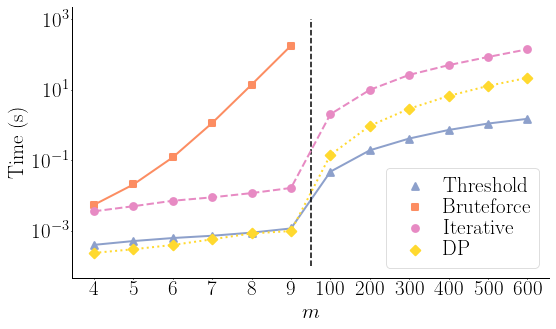

In [32]:
utils.latexify(5,5, font_scale=3.0)
temp_df = df[df['kappa']==0.1]
temp_df.sort_values(["algorithm"], inplace=True)
hue_order=["Threshold", "Bruteforce", "Iterative", "DP"]
linestyles = [linestyles_dict[algo] for algo in hue_order]
markers = [markers_dict[algo] for algo in hue_order]
g= sns.catplot(x="m", y="time", hue="algorithm", data=temp_df, kind="point", 
            aspect=1.6,legend=False,palette=col_dict ,linestyles=linestyles, hue_order=hue_order, markers=markers,ci=40)
plt.setp(g.ax.lines,linewidth=2)
plt.vlines(5.5,0.0001,1000,linestyle="--")
plt.legend(shadow=None, loc=4,labelspacing=0.1, handletextpad=0.3)
plt.ylabel("Time (s)")
plt.xlabel("$m$")
plt.yscale("log")
plt.savefig("./figures/optimal/{name}_t.pdf".format(name=name),bbox_inches='tight', )

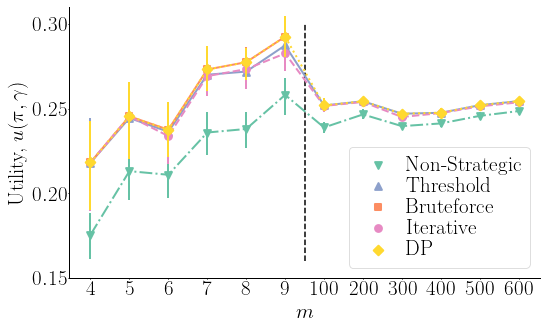

In [12]:
utils.latexify(5,5, font_scale=3.0)
temp_df = df[df['kappa']==0.1]
temp_df.sort_values(["algorithm"], inplace=True)
hue_order=["Non-Strategic", "Threshold", "Bruteforce", "Iterative", "DP"]
linestyles = [linestyles_dict[algo] for algo in hue_order]
markers = [markers_dict[algo] for algo in hue_order]
g= sns.catplot(x="m", y="utility", hue="algorithm", data=temp_df, kind="point", 
            aspect=1.6,legend=False,palette=col_dict ,linestyles=linestyles, hue_order=hue_order,
           markers=markers,ci=40)
plt.setp(g.ax.lines,linewidth=2)
plt.vlines(5.5,0.16,0.30,linestyle="--")
plt.legend(shadow=None, loc='lower right',labelspacing=0.1, handletextpad=0.3)
plt.ylabel("Utility, $u(\\pi , \\gamma)$")
plt.xlabel("$m$")
plt.ylim(0.15,0.31)
plt.savefig("./figures/optimal/{name}_u.pdf".format(name=name),bbox_inches='tight', )

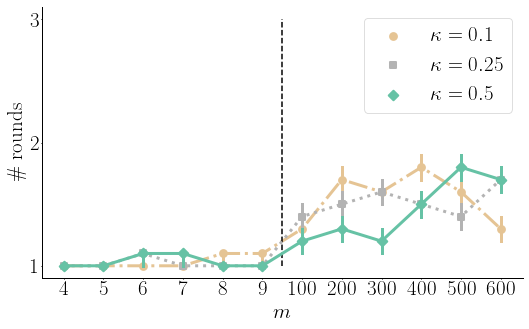

In [13]:
utils.latexify(5,5, font_scale=3.0,)
new_col_dict = {0.10: cols[6],
            0.25: cols[7],
            0.5: cols[8]
           }
temp_df=df[df['algorithm']=='DP']
g= sns.catplot(x="m", y="iterations", hue="kappa", data=temp_df, kind="point", 
            aspect=1.6,legend=False,palette=new_col_dict ,linestyles=["-.", ":","-"], hue_order=[0.1,0.25,0.5], markers=["o", "s", "D"],ci=40,scale=1)
plt.setp(g.ax.lines,linewidth=2)
lw = g.ax.lines[0].get_linewidth()
plt.setp(g.ax.lines,linewidth=3)
plt.vlines(5.5,1,3,linestyle="--")
plt.legend(shadow=None, loc="lower right",labelspacing=0.1, handletextpad=0.3, bbox_to_anchor=(1.05,0.09))
L=plt.legend()
L.get_texts()[0].set_text("$\\kappa = 0.1$")
L.get_texts()[1].set_text("$\\kappa = 0.25$")
L.get_texts()[2].set_text("$\\kappa = 0.5$")
plt.yticks([1,2,3])
plt.ylabel("\\# rounds")
plt.xlabel("$m$")
plt.savefig("./figures/optimal/{name}_iteration_dp_kappa.pdf".format(name=name),bbox_inches='tight', )

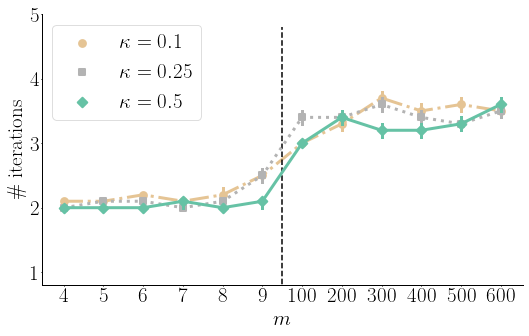

In [14]:
utils.latexify(5,5, font_scale=3.0,)
new_col_dict = {0.10: cols[6],
            0.25: cols[7],
            0.5: cols[8]
           }
temp_df=df[df['algorithm']=='Iterative']
g= sns.catplot(x="m", y="iterations", hue="kappa", data=temp_df, kind="point", 
            aspect=1.6,legend=False,palette=new_col_dict ,linestyles=["-.", ":","-"], hue_order=[0.1,0.25,0.5], markers=["o", "s", "D"],ci=40,scale=1)
plt.setp(g.ax.lines,linewidth=2)
lw = g.ax.lines[0].get_linewidth() # lw of first line
plt.setp(g.ax.lines,linewidth=3)
plt.vlines(5.5,0.2,4.8,linestyle="--")
plt.legend(shadow=None, loc="lower right",labelspacing=0.1, handletextpad=0.3, bbox_to_anchor=(1.05,0.09))
L=plt.legend()
L.get_texts()[0].set_text("$\\kappa = 0.1$")
L.get_texts()[1].set_text("$\\kappa = 0.25$")
L.get_texts()[2].set_text("$\\kappa = 0.5$")
plt.yticks([1,2,3,4,5])
plt.ylim(0.8,5)
plt.ylabel("\\# iterations")
plt.xlabel("$m$")
plt.savefig("./figures/optimal/{name}_iteration_iterative_kappa.pdf".format(name=name),bbox_inches='tight', )